<a href="https://colab.research.google.com/github/milnico/masterAI4HU/blob/main/15_07_Lezione8_backpropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

train loss 0.5993275333011718
test loss 0.6169922520171817
misclassified 77
train loss 0.2280997185082225
test loss 0.11147346972381181
misclassified 16
train loss 0.08375794958582108
test loss 0.09401154767154779
misclassified 11
train loss 0.07354693245597842
test loss 0.08574536523605195
misclassified 11
train loss 0.06731665430749767
test loss 0.07994480790939307
misclassified 10
train loss 0.06284167138328058
test loss 0.07545592462585729
misclassified 9
train loss 0.05939470125321744
test loss 0.07182869381218994
misclassified 7
train loss 0.05662133049780981
test loss 0.0688214413309699
misclassified 7
train loss 0.054320616448423065
test loss 0.06628360230705103
misclassified 7
train loss 0.052367902573050296
test loss 0.06411309800234598
misclassified 6
train loss 0.050680837601062234
test loss 0.06223682065613385
misclassified 6
train loss 0.049202389445932734
test loss 0.06060037881762671
misclassified 6
train loss 0.047891576912931486
test loss 0.05916216965709346
misclassi

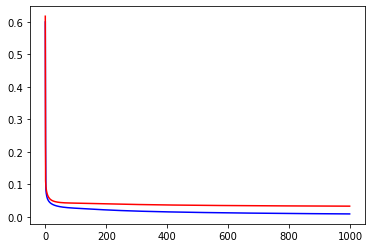

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

np.random.seed(22)
total_inputs, total_target = datasets.load_breast_cancer(return_X_y=True) 

def sigmoid(x):

    return 1 / (1 + np.exp(-x))


def sigmoid_der(x):
    return x * (1 - x)


class NN:
    def __init__(self, train,test):
        
        self.treshold = 0.1
        #num = int(len(inputs)*self.treshold)
        
        self.training_set = train#inputs[:-num]
        self.test_set = test#inputs[-num:]
        
        self.h = 100  # len(inputs)
        self.li = len(self.training_set[0])
        self.wi = (2 * np.random.random((self.li, self.h))) - 1
        self.wh = (2 * np.random.random((self.h, 1))) - 1
        self.lr = 0.01
        

    def predict(self, inp):

        s1 = sigmoid(np.dot(inp, self.wi))
        s2 = sigmoid(np.dot(s1, self.wh))
        return s2

    def train(self, train_target,test_target, epochs):
        loss_to_print = []
        test_loss_to_print = []
        for epoch in range(epochs):
            # print(epoch)
            # looping for every example.
            loss = []
            
            
            for i,x_i in enumerate(self.training_set):
              
             
              l0 = x_i.reshape((1,self.li))
              
              
              l1=sigmoid(np.dot(l0,self.wi))
              
              l2 = sigmoid(np.dot(l1,self.wh))
              
              
              l2_err=(train_target[i]-l2)**2
              loss.append(np.mean(l2_err))
              
              out_delta = np.multiply(l2_err,(train_target[i]-l2)*2) 
               
              l2_delta=np.multiply(out_delta,sigmoid_der(l2))
              
              l1_err = np.dot(l2_delta,self.wh.T)
              
              l1_delta = np.multiply(l1_err,sigmoid_der(l1))

              self.wh += self.lr*np.dot(l1.T,l2_delta)
              self.wi += self.lr*np.dot(l0.T,l1_delta)

            print("train loss",np.mean(loss))
            prediction = self.predict(self.test_set)
            prediction = prediction.reshape((len(prediction),))
            test_loss = np.mean((test_target-prediction)**2)
            print("test loss",test_loss)
            discrete_prediction = np.where(prediction<0.5,0,1)
            print("misclassified",np.sum(np.abs(discrete_prediction-test_target)))
            
            loss_to_print.append(np.mean(loss))
            test_loss_to_print.append(test_loss)
        return loss_to_print, test_loss_to_print
            

index = np.arange(len(total_inputs))

np.random.shuffle(index)
total_inputs = total_inputs[index]
total_target = total_target[index]
sc = StandardScaler()

total_inputs= sc.fit_transform(total_inputs)
num = int(len(total_inputs)*0.2)
training_target = total_target[:-num]
test_target = total_target[-num:]
       
training_set = total_inputs[:-num]
test_set = total_inputs[-num:]

net = NN(training_set,test_set)
prediction = net.predict(test_set)
pred = np.where(prediction<0.5,0,1).reshape((len(prediction)))
loss, t_loss = net.train(training_target,test_target,1000)
plt.plot(loss,'b')
plt.plot(t_loss,'r')
plt.show()
